In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview of case:
The Corporate Strategy Manager, who is leading the 3-Year Strategic Plan project, is interested in
understanding the options available for a local expansion strategy, including increase the size of the
shops. For this purpose, he wants you to:
Issue 1: Perform a sales value and volume analysis of the three coffee shops to identify the
best shops to invest for future expansion.
As part of the analysis, the Marketing Manager is considering options to increase the return from his
marketing budget by better targeting the core market segments the company serves with promotion
campaigns. Currently customers are grouped into six market segments:

• single professional/working people,
• young married couples,
• married couples with children (e.g. families),
• young people (e.g. students),
• tourists and
• retired people.

In order to increase the return of investment of the marking function, the Marketing Manager wants
to target COTS’s promotions campaigns to those market segments with the highest sales potential,
so he can increase the revenue per customer. Therefore, he wants you to:
Issue 2: Perform a customer analysis to identify which market segments provides the
highest revenue.
COTS current products are well appreciated by customers because of their high quality. The menu is
made of Cakes, Coffee, Cold drinks, Hot drinks and Pastry. However, as part of COTS’s strategy to
appeal to a wider market, in June 2022 the company run a trial at its shop in Plymouth where two
new range of products were added to the menu: breakfast and healthy snacks. Breakfast menu
includes hearty blueberry oatmeal, bacon & gouda breakfast sandwich, spinach & feta breakfast
wrap and slow roasted ham & Swiss cheese on croissant bun. The healthy menu includes a fruit bar,
protein bistro box, omega 3 bistro box and cheese & fruit bistro box. The Sales Director is keen to
understand if these two new entries to the menu could be expanded to other shops in the chain. So,
he wants you to address the question:
Issue 3: Did the two new product ranges (breakfast and healthy snacks) added to
Plymouth’s menu have a positive impact on the sales performance of the shop?
The responses to the issues detailed above should be included in a summary MS Word report that
you save and submit as a PDF format file.
Because this is your first project within COTS, the Corporate Strategy Manager has given you
additional details regarding the structure and content that it is expected to see in your report. This
is set out in Section 3 – Report Structure.

A set of data is available (dataset spreadsheet file). Since the data comes directly from
the coffee shops, quality issues are present which will require your attention!

Tasks:
(Table A) Sales volume and value by month, by year and across the 3 years period
(Table B) Benchmark comparisons of market segments performance covering sales volume
and value by year and across the 3 years period, and
(Table C) Benchmark comparisons of sales volume and value between coffee shops by year and across the 3 years period. 

Charts:
(Chart A) Comparison of sales value trends across coffee shops over time
(Chart B) Market segments performance comparisons between coffee shops, and
(Chart C) Impact of the addition of the two new product ranges to the Plymouth’s menu,
and in comparison with the other two cities.

In [2]:
df=pd.read_excel("H:/sanjeev/cafe data.xlsx")
df.head()

,City coffee shop,Year,Month,Market segment,Sales Volume,Sales Value
0,Poole,2020,1,Young people,89,369.0
1,Poole,2020,1,Single professional people,44,82.0
2,Poole,2020,1,Married young couples,59,137.0
3,Poole,2020,1,Families with children,22,121.0
4,Poole,2020,1,Tourists,17,105.0


# Data cleaning.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City coffee shop  648 non-null    object 
 1   Year              648 non-null    int64  
 2   Month             648 non-null    int64  
 3   Market segment    648 non-null    object 
 4   Sales Volume      648 non-null    object 
 5   Sales Value       648 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 30.5+ KB


In [4]:
df["City coffee shop"].unique()

array(['Poole', 'Pooleham', 'Newquay', 'Plymouth'], dtype=object)

In [5]:
def handle (value):
    value=str(value).replace("Pooleham","Poole")
    return value
df["City coffee shop"]=df["City coffee shop"].apply(handle)
df["City coffee shop"].unique()

array(['Poole', 'Newquay', 'Plymouth'], dtype=object)

In [6]:
df["Year"].unique()

array([2020, 2021, 2022, 2032], dtype=int64)

In [7]:
def handle_year (value):
    value=str(value).replace("2032","2022")
    return int(value)
df["Year"]=df["Year"].apply(handle_year)
df["Year"].unique()

array([2020, 2021, 2022], dtype=int64)

In [8]:
df["Market segment"].unique()

array(['Young people ', 'Single professional people',
       'Married young couples ', 'Families with children', 'Tourists',
       'Retired people', 'Married Y.P.', 'Turistas', 'Retired',
       'Fam. children'], dtype=object)

In [10]:
mapping_dict = {
    'Young people ': 'Young people',
    'Single professional people': 'Single professionals',
    'Married young couples ': 'Married young couples',
    'Married Y.P.': 'Married young couples',
    'Families with children': 'Families with children',
    'Tourists': 'Tourists',
    'Retired people': 'Retired people',
    'Retired': 'Retired people',
    'Fam. children': 'Families with children'}

df["Market segment"].replace(mapping_dict, inplace=True)

print(df["Market segment"].unique())


['Young people' 'Single professionals' 'Married young couples'
 'Families with children' 'Tourists' 'Retired people']


In [12]:
df.columns

Index(['City coffee shop', 'Year', 'Month', 'Market segment', 'Sales Volume',
       'Sales Value'],
      dtype='object')

In [13]:
df["Sales Volume"].unique()

array([89, 44, 59, 22, 17, 56, 97, '-', 54, 24, 18, 63, 99, 49, 61, 23,
       58, 146, 60, 76, 35, 67, 104, 46, 65, 37, 19, 47, 85, 117, 55, 66,
       41, 25, 68, 133, 64, 78, 42, 98, 122, 40, 70, 84, 110, 62, 29, 75,
       93, 52, 69, 32, 77, 86, 38, 80, 26, 96, 48, 33, 20, 124, 145, 30,
       100, 123, 51, 107, 74, 27, 16, 73, 53, 72, 132, 34, 116, 82, 128,
       45, 112, 12, 71, 126, 106, 31, 91, 103, 90, 87, 114, 81, 143, 108,
       36, 120, 121, 138.5, 75.5, 23.5, 138, 94, 45.5, 169, 93.5, 47.5,
       30.5, 175, 109, 54.5, 39.5, 144.5, 104.5, 44.5, 141.5, 124.5, 32.5,
       197.5, 38.5, 161.5, 86.5, 106.5, 111.5, 123.5, 77.5, 134.5, 65.5,
       85.5, 109.5, 87.5, 102.5, 91.5, 149.5, 28.5, 35.5, 25.5, 72.5,
       113.5, 90.5, 42.5, 27.5, 81.5, 203, 108.5, 142, 125.5, 135, 83,
       118.5, 24.5, 173.5, 112.5, 127.5, 185, 43.5, 208.5, 155.5, 71.5,
       99.5, 50, 121.5, 171.5, 48.5, 125, 172, 53.5, 115.5, 105, 57.5,
       78.5, 159.5, 163, 79, 92.5, 128.5, 194, 95.5, 46.

In [14]:
dc={"-":"0"}
df["Sales Volume"].replace(dc,inplace=True)
df["Sales Volume"].unique()

array([89, 44, 59, 22, 17, 56, 97, '0', 54, 24, 18, 63, 99, 49, 61, 23,
       58, 146, 60, 76, 35, 67, 104, 46, 65, 37, 19, 47, 85, 117, 55, 66,
       41, 25, 68, 133, 64, 78, 42, 98, 122, 40, 70, 84, 110, 62, 29, 75,
       93, 52, 69, 32, 77, 86, 38, 80, 26, 96, 48, 33, 20, 124, 145, 30,
       100, 123, 51, 107, 74, 27, 16, 73, 53, 72, 132, 34, 116, 82, 128,
       45, 112, 12, 71, 126, 106, 31, 91, 103, 90, 87, 114, 81, 143, 108,
       36, 120, 121, 138.5, 75.5, 23.5, 138, 94, 45.5, 169, 93.5, 47.5,
       30.5, 175, 109, 54.5, 39.5, 144.5, 104.5, 44.5, 141.5, 124.5, 32.5,
       197.5, 38.5, 161.5, 86.5, 106.5, 111.5, 123.5, 77.5, 134.5, 65.5,
       85.5, 109.5, 87.5, 102.5, 91.5, 149.5, 28.5, 35.5, 25.5, 72.5,
       113.5, 90.5, 42.5, 27.5, 81.5, 203, 108.5, 142, 125.5, 135, 83,
       118.5, 24.5, 173.5, 112.5, 127.5, 185, 43.5, 208.5, 155.5, 71.5,
       99.5, 50, 121.5, 171.5, 48.5, 125, 172, 53.5, 115.5, 105, 57.5,
       78.5, 159.5, 163, 79, 92.5, 128.5, 194, 95.5, 46.

In [15]:
df["Sales Value"].unique()


array([ 369.   ,   82.   ,  137.   ,  121.   ,  105.   ,  106.   ,
        407.   ,    0.   ,  129.5  ,  127.   ,  117.   ,  124.   ,
        398.   ,  115.   ,  166.5  ,  120.   ,  109.   ,  586.   ,
        118.   ,  198.5  ,  177.   ,  136.   ,  148.   ,  433.   ,
         87.   ,  181.   ,  193.   ,  103.   ,  111.   ,  393.   ,
         92.   ,  203.   ,   99.   ,  155.   ,  473.   ,  128.   ,
        151.5  ,  186.   ,  122.   ,  548.   ,  132.   ,  205.5  ,
        225.   ,  206.   ,  474.   ,   77.   ,  172.5  ,  123.   ,
        171.   ,  455.   ,  108.   ,  189.   ,  174.   ,  135.   ,
        154.   ,  349.   ,  172.   ,  161.   ,  162.   ,  485.   ,
         81.   ,  202.5  ,  191.   ,  129.   ,  357.   ,  107.   ,
        139.   ,  116.   ,  411.   ,  163.   ,  472.   ,  113.   ,
        209.5  ,   89.   ,  150.   ,  581.   ,  143.   ,  212.5  ,
        165.   ,  182.   ,  196.   ,  489.   ,   86.   ,  160.5  ,
        102.   ,  140.   ,  446.   ,  194.   ,  114.   ,  141.

In [17]:
d={"-":"0"}
df["Sales Value"].replace(d)
df["Sales Value"].unique()

array([ 369.   ,   82.   ,  137.   ,  121.   ,  105.   ,  106.   ,
        407.   ,    0.   ,  129.5  ,  127.   ,  117.   ,  124.   ,
        398.   ,  115.   ,  166.5  ,  120.   ,  109.   ,  586.   ,
        118.   ,  198.5  ,  177.   ,  136.   ,  148.   ,  433.   ,
         87.   ,  181.   ,  193.   ,  103.   ,  111.   ,  393.   ,
         92.   ,  203.   ,   99.   ,  155.   ,  473.   ,  128.   ,
        151.5  ,  186.   ,  122.   ,  548.   ,  132.   ,  205.5  ,
        225.   ,  206.   ,  474.   ,   77.   ,  172.5  ,  123.   ,
        171.   ,  455.   ,  108.   ,  189.   ,  174.   ,  135.   ,
        154.   ,  349.   ,  172.   ,  161.   ,  162.   ,  485.   ,
         81.   ,  202.5  ,  191.   ,  129.   ,  357.   ,  107.   ,
        139.   ,  116.   ,  411.   ,  163.   ,  472.   ,  113.   ,
        209.5  ,   89.   ,  150.   ,  581.   ,  143.   ,  212.5  ,
        165.   ,  182.   ,  196.   ,  489.   ,   86.   ,  160.5  ,
        102.   ,  140.   ,  446.   ,  194.   ,  114.   ,  141.

In [18]:
df.columns

Index(['City coffee shop', 'Year', 'Month', 'Market segment', 'Sales Volume',
       'Sales Value'],
      dtype='object')

# data visualization


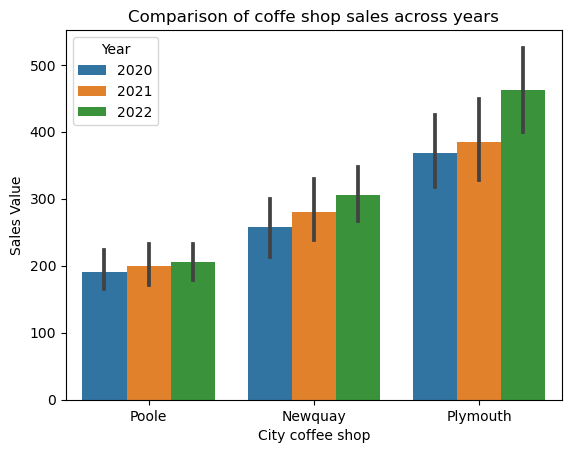

In [24]:
#chart 1
a=sns.barplot(x="City coffee shop",y="Sales Value",hue="Year",data=df)
plt.title("Comparison of coffe shop sales across years")
plt.show()

<Figure size 2900x600 with 0 Axes>

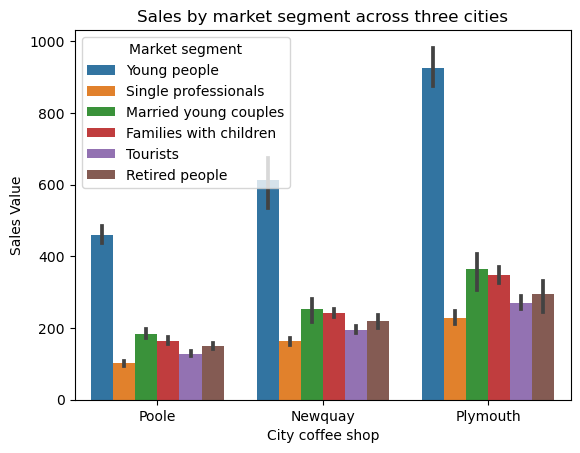

<Figure size 2900x600 with 0 Axes>

In [38]:
#chart 2
sns.barplot(x="City coffee shop",y="Sales Value", data=df, hue="Market segment")
plt.title("Sales by market segment across three cities")
plt.figure(figsize=(29,6))


Text(0.5, 1.0, 'Impact on sales of Plymouth in 2022')

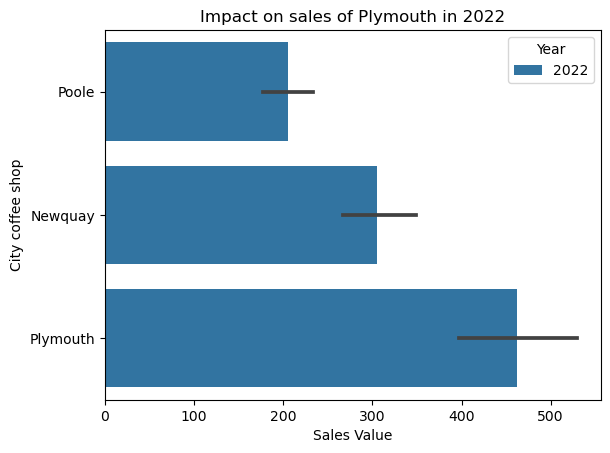

In [39]:
#chart 2
x=df[df["Year"]==2022]
f=x[["Year","Sales Value","City coffee shop"]]
sns.barplot(x="Sales Value",y="City coffee shop",hue="Year",data=f)
plt.title("Impact on sales of Plymouth in 2022")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City coffee shop  648 non-null    object 
 1   Year              648 non-null    int64  
 2   Month             648 non-null    int64  
 3   Market segment    648 non-null    object 
 4   Sales Volume      648 non-null    object 
 5   Sales Value       648 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 30.5+ KB


In [46]:
df["Sales Volume"]=df["Sales Volume"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City coffee shop  648 non-null    object 
 1   Year              648 non-null    int64  
 2   Month             648 non-null    int64  
 3   Market segment    648 non-null    object 
 4   Sales Volume      648 non-null    int32  
 5   Sales Value       648 non-null    float64
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 28.0+ KB


In [48]:
#Table 1
pv=df.pivot_table(values=["Sales Volume","Sales Value"],index=["Year","Month"])
pv

Sales Value  Sales Volume
Year Month                           
2020 1       221.791667     67.611111
     2       181.638889     73.444444
     3       273.097222     85.277778
     4       304.083333     95.833333
     5       269.097222     83.166667
     6       284.486111     88.277778
     7       320.305556     97.888889
     8       328.125000    101.166667
     9       265.722222     83.388889
     10      273.847222     84.277778
     11      257.680556     82.222222
     12      288.527778     89.944444
2021 1       232.291667     72.833333
     2       249.125000     77.722222
     3       278.347222     85.277778
     4       340.388889    106.333333
     5       235.347222     80.833333
     6       303.263889     94.944444
     7       317.111111     98.333333
     8       348.638889    107.444444
     9       285.569444     88.277778
     10      298.000000     91.611111
     11      298.111111     92.833333
     12      270.041667     94.722222
2022 1       235.819444     72.166667
     2       257.125000     80.777778
     3       295.597222     90.444444
     4       353.930556    112.333333
     5       296.791667     91.722222
     6       308.788556    100.888889
     7       373.591222    118.111111
     8       435.183000    133.611111
     9       330.380556    103.666667
     10      331.297000    104.222222
     11      346.659000    108.000000
     12      326.648444    103.333333

In [50]:
#Table 2
t2=df.pivot_table(values=["Sales Value","Sales Volume"],index=["Year","Market segment"])
t2

Sales Value  Sales Volume
Year Market segment                                   
2020 Families with children   239.263889     47.250000
     Married young couples    253.854167    101.916667
     Retired people           194.250000    101.833333
     Single professionals     153.166667     75.694444
     Tourists                 183.916667     31.305556
     Young people             609.750000    158.250000
2021 Families with children   244.722222     49.361111
     Married young couples    239.412162    106.216216
     Retired people           214.657143    108.628571
     Single professionals     162.805556     81.638889
     Tourists                 194.694444     32.194444
     Young people             671.138889    167.611111
2022 Families with children   269.443056     54.666667
     Married young couples    306.596667    123.472222
     Retired people           256.853444    127.333333
     Single professionals     177.411778     88.472222
     Tourists                 213.912889     35.222222
     Young people             721.688000    180.472222

In [52]:
#Table 3
t3=df.pivot_table(values=["Sales Value","Sales Volume"],index=["City coffee shop","Year"])
t3

Sales Value  Sales Volume
City coffee shop Year                           
Newquay          2020   258.038194     84.111111
                 2021   280.149306     89.805556
                 2022   305.190972     95.041667
Plymouth         2020   368.791667    115.583333
                 2021   384.333333    121.541667
                 2022   462.713333    144.888889
Poole            2020   190.270833     58.430556
                 2021   199.576389     61.444444
                 2022   205.048611     64.888889